## SurfinPy

#### Tutorial 2 - Introducing temperature dependence

In tutorial 1 we generated a phase diagram at 0K. However this is not representative of normal conditions. Temperature is an important consideration for materials chemists and we may wish to evaluate the state of a solid electrolyte at the operating temperature or synthesis conditions. In order to overcome this and introduce temperature we need to modify the equation for our surface energy in tutorial 1. This explanation will again be using $TiO_2$

\begin{align}
\gamma_{Surf} & = \frac{1}{2A} \Bigg( E_{TiO_2}^{slab} - \frac{nTi_{Slab}}{nTi_{Bulk}} E_{TiO_2}^{Bulk} \Bigg) - \Gamma_O \mu_O - \Gamma_{H_2O} \mu_{H_2O} - n_O \mu_O (T) - n_{H_2O} \mu_{H_2O} (T) 
\end{align}

where A is the surface area, $E_{TiO_2}^{slab}$ is the DFT energy of the slab, $nTi_{Slab}$ is the number of cations in the slab, $nTi_{Bulk}$ is the number of cations in the bulk unit cell, $E_{TiO_2}^{Bulk}$ is the DFT energy of the bulk unit cell and

\begin{align}
\Gamma_O & = \frac{1}{2A} \Bigg( nO_{Slab} - \frac{nO_{Bulk}}{nTi_{Bulk}}nTi_{Slab}  \Bigg) ,
\end{align}

\begin{align}
\Gamma_{H_2O} & = \frac{nH_2O}{2A} ,
\end{align}

$nO_{Slab}$ is the number of anions in the slab, $nO_{Bulk}$ is the number of anions in the bulk, $nH_2O$ is the number of adsorbing water molecules and $n_O$ is the number of defective oxygen. $\Gamma_O$ / $\Gamma_{H_2O}$ is the excess oxygen / water at the surface and $\mu_O$ / $\mu_{H_2O}$ is the oxygen / water chemcial potential. $\mu_{H_2O} $(T) / $\mu_O (T)$ are terms to correct the chemcial potential of oxygen and water based on thermochemical data from the NIST_JANAF database, making the chemical potential a temperature dependent term. 

\begin{align}
\mu_O (T) &  = \frac{1}{2} \mu_O (T) (0 K , DFT) +  \frac{1}{2} \mu_O (T) (0 K , EXP) +  \frac{1}{2} \Delta G_{O_2} ( \Delta T, Exp)
\end{align}

where $\mu_O$ (T) (0 K , DFT) is the 0K free energy of an isolated oxygen moleculeevaluated with DFT, $\mu_O$ (T) (0 K , EXP) is the 0 K experimental  Gibbs energy for oxygen gas and $\Delta$ $G_{O_2}$ ( $\Delta$ T, Exp) is the Gibbs energy defined at temperature T as

\begin{align}
\Delta G_{O_2} ( \Delta T, Exp) &  = \frac{1}{2} [H(T, {O_2}) -  H(0 K, {O_2})] -  \frac{1}{2} T[S(T, {O_2}])
\end{align}

In [1]:
import matplotlib.pyplot as plt
from surfinpy import mu_vs_mu
from surfinpy import utils as ut
from surfinpy import data

In order to calculate our $\Delta$ $G_{O_2}$ ( $\Delta$ T, Exp) values we need to use experimental data from the NIST-JANAF database. As a user you need to download the tables for the species you are interested in ( In our case oxygen and water). Surfinpy has a function that can read this data, assuming it is in the correct format and calculate the temperature correction for you. Provide the path to the file and the temperature that you want as an index.

In [2]:
Oxygen_exp = ut.fit_nist("O2.txt")[298]
Water_exp = ut.fit_nist("H2O.txt")[298]

-9.08 is the DFT energy of an oxygen molecule, -0.86 is the zero point energy and Oxygen_exp is the experimental free energy at 298 K. 

In [3]:
Oxygen_corrected = (-9.08 + -0.86 + Oxygen_exp) / 2 
Water_corrected = -14.84 + 0.55 + Water_exp
print(Oxygen_corrected)
print(Water_corrected)

-5.2427609629166
-14.77234481554258


Oxygen_corrected and Water_corrected are now temperature dependent terms corresponding to a temperature of 298 K. The resulting phase diagram will now be at a temperature of 298 K. 

In [4]:
bulk = data.ReferenceDataSet(cation = 1, anion = 2, energy = -780.0, funits = 4)

pure = data.DataSet(cation = 24, x = 48, y = 0, area = 60.0, energy = -575.0, label = "0.00 $TiO_2$", nspecies = 1)
H2O = data.DataSet(cation = 24, x = 48, y = 2, area = 60.0, energy = -612.0, label = "0.16 $TiO_2$", nspecies = 1)
H2O_2 = data.DataSet(cation = 24, x = 48, y = 4, area = 60.0, energy = -640.0, label = "0.32 $TiO_2$", nspecies = 1)
H2O_3 = data.DataSet(cation = 24, x = 48, y = 8, area = 60.0, energy = -676.0, label = "0.64 $TiO_2$", nspecies = 1)
Vo = data.DataSet(cation = 24, x = 46, y = 0, area = 60.0, energy = -558.0, label = "0.00 $TiO_1.9$", nspecies = 1)
H2O_Vo_1 = data.DataSet(cation = 24, x = 46, y = 2, area = 60.0, energy = -594.0, label = "0.00 $TiO_1.9$", nspecies = 1)
H2O_Vo_2 = data.DataSet(cation = 24, x = 46, y = 4, area = 60.0, energy = -624.0, label = "0.16 $TiO_1.9$", nspecies = 1)
H2O_Vo_3 = data.DataSet(cation = 24, x = 46, y = 6, area = 60.0, energy = -640.0, label = "0.32 $TiO_1.9$", nspecies = 1)
H2O_Vo_4 = data.DataSet(cation = 24, x = 46, y = 8, area = 60.0, energy = -670.0, label = "0.64 $TiO_1.9$", nspecies = 1)

data = [pure, Vo, H2O, H2O_Vo_1, H2O_2, H2O_Vo_2, H2O_3, H2O_Vo_3,  H2O_Vo_4]


In [5]:
deltaX = {'Range': [ -12, -6],  'Label': 'O'}
deltaY = {'Range': [ -19, -12], 'Label': 'H_2O'}

In [6]:
system =  mu_vs_mu.calculate(data, bulk, deltaX, deltaY, x_energy=Oxygen_corrected, y_energy=Water_corrected)

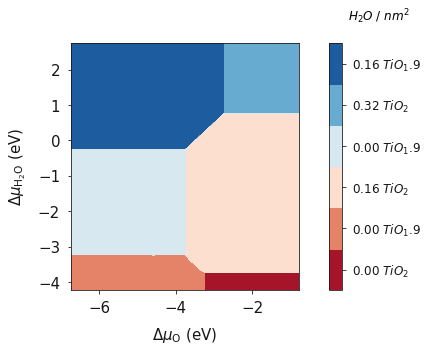

In [7]:
ax = system.plot_phase(temperature=298, set_style="fast", colourmap="RdBu", cbar_title="$H_2O$ $/$ $nm^2$", figsize=(6, 5))
plt.savefig("../../../docs/source/Figures/Surfaces_3.png", dpi=600)
plt.show()